# Lab 1: Building a Neural Network

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Some Anatomy and Notation

### Inputs
The inputs to a neural network are $x$.  We will consider these inputs to be real numbers so that $x\in\mathbb{R}^{n}$ where $n$ is the dimension of the input vector.  For example, if we have $3$ datapoints, then $x\in\mathbb{R}^{3}$ and we say $$x = \begin{bmatrix}x_{1} \\ x_{2} \\ x_{3}\end{bmatrix}.$$

### Weighting the Inputs
You will see very soon that the inputs are weighted by a matrix $W$.  For now, while we're warming up, we'll just say that the weight matrix is just a vector of dimension $n$ and we will denote it with a lower-case $w$.  Weighting the inputs means taking the dot product of $w$ and $x$:  $w\cdot x$.

### Activation Function
We denote all activation functions by $\sigma\left(z\right)$ whether the activation is a sigmoid, ReLu, or something else entirely.  It is assumed that the activation function accepts and returns a scalar argument.

### Neuron Outputs
The output of a single neuron is denoted by $h$.  This is the output of the activation function.

### Output
We denote the output of the neural network by $y$.  Once again, we say $y\in\mathbb{R}$.


## The Perceptron

We begin with a single neuron, which we called the *perceptron*.

![perceptron](figs/perceptron.png)

There are some inputs $x$, which get combined into an auxilliary variable $z$.  The auxilliary variable is passed to the activation function $\sigma\left(z\right)$ and the result is the output.

Here is another image showing each step.

![](figs/expanded-perceptron.png)

Notice that the inputs are linearly combined according to some weights $w$ and a bias $b$.  The perceptron transforms the weighted inputs according to the rule of the activation function.  For a single perceptron, the output $y$ is just the output from the perceptron.

In [30]:
x = np.linspace(-5.0, 5.0, 500) # input points
y = np.exp(-x*x)

w = np.random.uniform(-5.0, 5.0, 1) # Random weights from uniform distribution
b = np.random.uniform(-5.0, 5.0, 1) # Random bias

# Perceptron output
z = w * x + b
h = 1.0 / (1.0 + np.exp(-z))

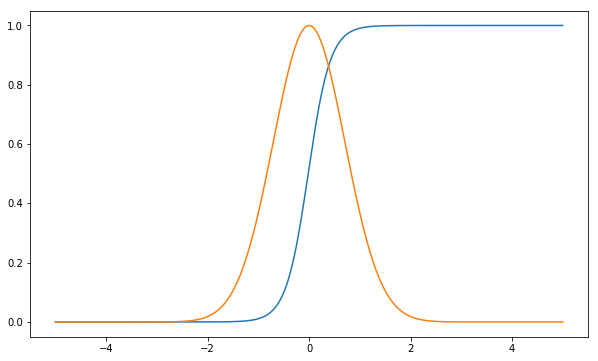

In [31]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(x, h)
ax.plot(x, y)

The prediction looks awful.  But we expected that.  The single perceptron simple turns the output on and off give some threshold.  What do you think will happen if you change $w$ and $b$?

### Exercise

#### Part 1
Write two `Python` functions:
1. The first function should return an affine transformation of the data for a single perceptron.  Here's the required interface:
```python
def affine(x, w, b):
    """Return affine transformation of x
    
    INPUTS
    ======
    x: A numpy array of points in x
    w: A float representing the weight of the perceptron
    b: A float representing the bias of the perceptron
    
    RETURN
    ======
    z: A numpy array of points after the affine transformation
       z = wx + b
    """
    
    # Code goes here
    return z
```
2. The second function should return the logistic activation function.  Here's the required interface:
```python
def logistic(z):
    # Code goes here
    return h
```

#### Part 2
* Using your two functions, recreate the example from class
* Try to change the weight and bias to get a better fit

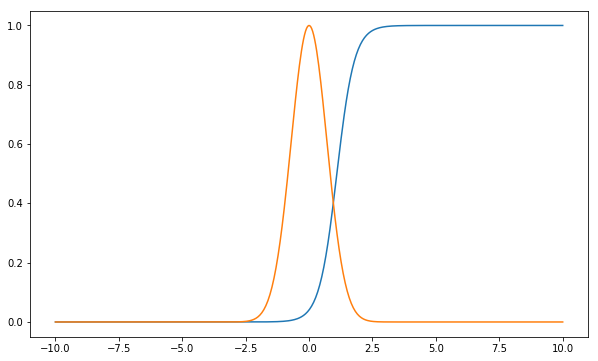

In [32]:
def affine(x, w, b):
    return w * x + b

def logistic(z):
    return 1.0 / (1.0 + np.exp(-z))

x = np.linspace(-10.0, 10.0, 500) # input points
y = np.exp(-x*x) # data

w = np.random.uniform(-5.0, 5.0, 1) # Random weights from uniform distribution
b = np.random.uniform(-5.0, 5.0, 1) # Random bias

h = logistic(affine(x, w, b))

fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(x, h)
ax.plot(x, y)

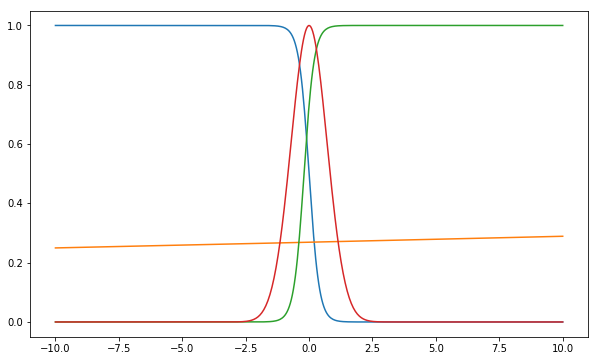

In [33]:
w = [-5.0, 0.01, 5.0]
b = [0.0, -1.0, 1.0]

fig, ax = plt.subplots(1,1, figsize=(10,6))
for wi, bi in zip(w, b):
    h = logistic(affine(x, wi, bi))
    ax.plot(x, h)

ax.plot(x, y)

We didn't do an exhaustive search of the weights and biases, but it sure looks like this single perceptron is never going to match the actual function.  Again, we shouldn't be suprised about this.  The output layer of the network is simple the logistic function, which can only has so much flexibility.

However, not all hope is lost.  We may be able to make our network more flexible by using more nodes.

## Multiple Perceptrons in a Single Layer
It appears that a single neuron is somewhat limited in what it can accomplish.  What if we expand the number of neurons in our network?  We have two obvious choices here.  One option is to add depth to the network by putting neurons next to each other.  We won't take this route yet.  The other option is to stack neurons on top of each other.  Now the network has some width.  Such a network has some width, but is still only one layer deep.

The following figure shows a single-layer network with two nodes in one layer.

![](figs/multiple-perceptrons.png)

#### Some observations
1. We still have a single input in this case.  Note that this is not necessary in general.  We're just keeping this simple with a single input for now.
2. Each node (or neuron) has a weight and bias associated with it.  An affine transformation is performed for each node.
3. Both nodes use the same activation function form $\sigma\left(\cdot\right)$ on their respective inputs.
4. The outputs of the nodes must be combined to give the overall output of the network.  There are a variety of ways of accomplishing this.  In the current example, we just take a linear combination of the node outputs to produce the actual prediction.

Let's see what happens in this case.

In [34]:
x = np.linspace(-10.0, 10.0, 500) # input points
y = np.exp(-x*x) # data

w = np.random.uniform(-3.0, 3.0, 2) # Random weights from uniform distribution
b = np.random.uniform(-3.0, 3.0, 2) # Random bias

print(w, b)

# Affine transformations
z1 = w[0] * x + b[0]
z2 = w[1] * x + b[1]

# Node outputs
h1 = 1.0 / (1.0 + np.exp(-z1))
h2 = 1.0 / (1.0 + np.exp(-z2))

[2.46020425 0.85650069] [1.49905423 0.03953706]


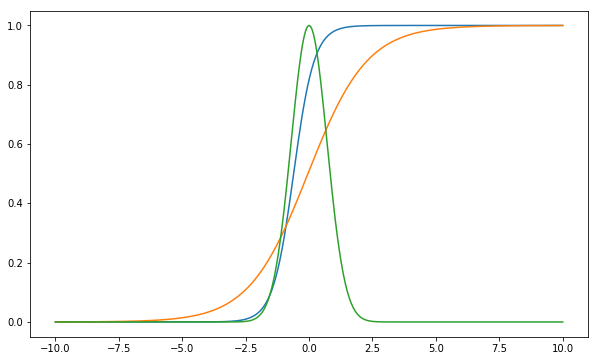

In [35]:
fig, ax = plt.subplots(1,1, figsize=(10,6))

ax.plot(x, h1)
ax.plot(x, h2)
ax.plot(x, y)

Let's see what the network predicts.  First we'll just add $h_{1}$ and $h_{2}$ without any weights to see what happens.

In [36]:
# Network output
wout = np.ones(2)
bout = 1.0
yhat = wout[0] * h1 + wout[1] * h2 + bout

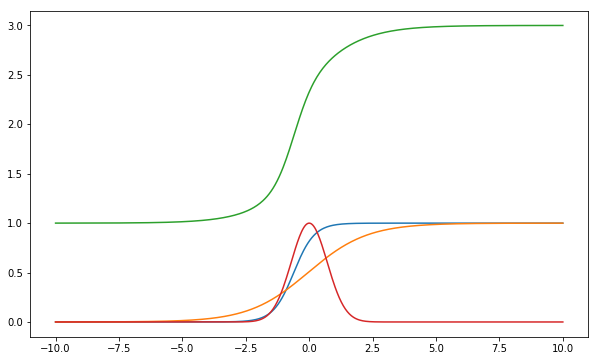

In [37]:
fig, ax = plt.subplots(1,1, figsize=(10,6))

ax.plot(x, h1)
ax.plot(x, h2)
ax.plot(x, yhat)
ax.plot(x, y)

Now let's see what happens when we change the weights on the output.

In [52]:
# Network output
wout = np.random.uniform(-3.0, 3.0, 2)
bout = np.random.uniform(-3.0, 3.0, 1)
print(wout, bout)
yhat = wout[0] * h1 + wout[1] * h2 + bout

[-0.79828012  2.35545213] [-0.10070404]


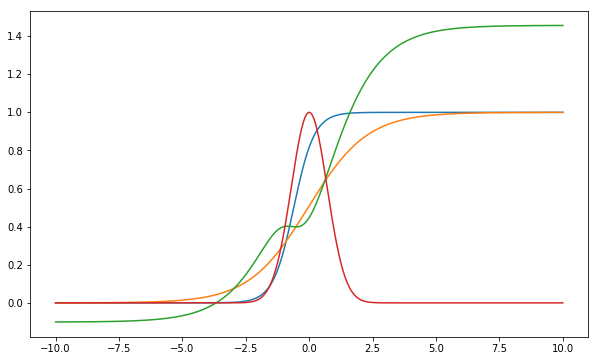

In [53]:
fig, ax = plt.subplots(1,1, figsize=(10,6))

ax.plot(x, h1)
ax.plot(x, h2)
ax.plot(x, yhat)
ax.plot(x, y)

Very cool!  The two nodes interact with each other to produce a pretty complicated-looking function.  It still doesn't match the true function, but now we have some hope.  There are three obvious options at this point:
1. Change the number of nodes
2. Change the activation functions
3. Change the weights

### Notes
Before proceeding, let's learn a more succint way of doing the calculations.  If you have a network with a lot of nodes, then you probably don't want to manually determine the output of each node.  It will take forever.  Instead, you can package the computations up using a more compact notation.

Suppose you have...

### Exercise

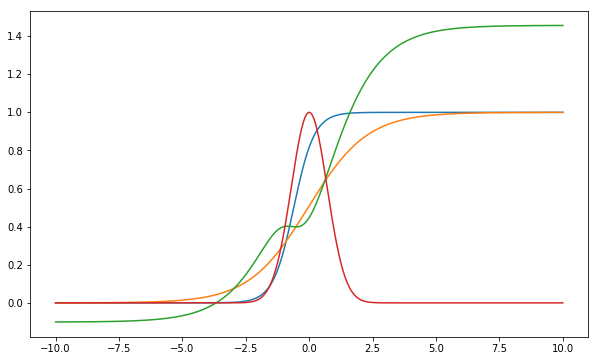

In [54]:
def nodes(x, w, b):
    z = np.tensordot(w, x, axes=0) + b.reshape((len(w),-1))
    return 1.0 / (1.0 + np.exp(-z))

def output(h, wout, bout):
    return np.tensordot(wout, h, axes=1) + bout

num_nodes = 2
#w = np.random.uniform(-3.0, 3.0, num_nodes)
#wout = np.random.uniform(-3.0, 3.0, num_nodes)

h = nodes(x, w, b)
yout = output(h, wout, bout)


fig, ax = plt.subplots(1,1, figsize=(10,6))

ax.plot(x, h[0,:])
ax.plot(x, h[1,:])
ax.plot(x, yout)
ax.plot(x, y)

## Changing Number of Nodes

Now compare solution with different number of nodes.

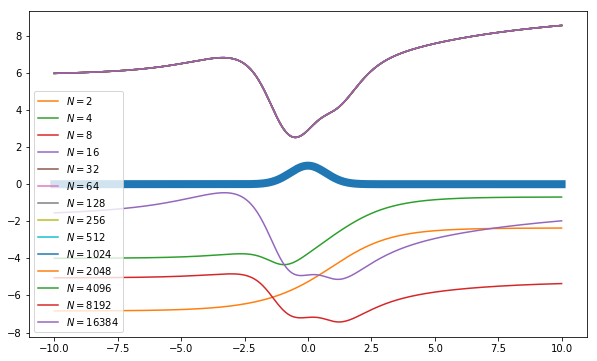

In [55]:
num_nodes = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384]

ws = np.random.uniform(-3.0, 3.0, 32)
bs = np.random.uniform(-3.0, 3.0, 32)

wouts = np.random.uniform(-3.0, 3.0, 32)
bout = np.random.uniform(-3.0, 3.0, 1)

fig, ax = plt.subplots(1,1, figsize=(10,6))

ax.plot(x, y, lw=8)

for N in num_nodes:
    w = ws[:N]
    b = bs[:N]
    
    wout = wouts[:N]
    
    h = nodes(x, w, b)
    yout = output(h, wout, bout)

    ax.plot(x, yout, label=r'$N = {{{0}}}$'.format(N))

ax.legend()

That's a little disappointing.  We're getting more complex behavior in our predictions, but they're still barely matching the true function.  It could be our activation function choice (sigmoid).  Or (more likely) it's the weights that we are using.  Right now, we're just grabbing random weights.  Let's do a grid-search over the weights and biases and assess the affects.

## Changing Weights
To keep things simple, let's go back to the single layer, two-node network.

In [15]:
num_nodes = 2

w = np.random.uniform(-3.0, 3.0, num_nodes)
b = np.random.uniform(-3.0, 3.0, num_nodes)

wout = np.random.uniform(-3.0, 3.0, num_nodes)
bout = np.random.uniform(-3.0, 3.0, 1)

h = nodes(x, w, b)
yout = output(h, wout, bout)

In [ ]:
# Maybe create weights and biases in a meshgrid
# Will tensordot still work nicely for this case?
# If so, then we get h at all the w and b values for each x
# Then same kind of thing for wout
# Then we're done
# But the problem is that we have a kind of weird tensor now.

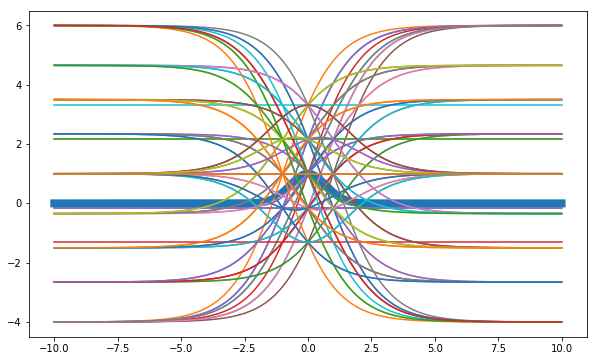

In [57]:
nw = 3
L = 1.0
w_one = np.linspace(-L, L, nw)
w_two = np.linspace(-L, L, nw)
b_one = np.linspace(-L, L, nw)
b_two = np.linspace(-L, L, nw)

wout = np.array([-5.0, 5.0])
bout = 1.0

fig, ax = plt.subplots(1,1, figsize=(10,6))

ax.plot(x, y, lw=8)
for w1 in w_one:
    for w2 in w_two:
        w = np.array([w1, w2])
        for b1 in b_one:
            for b2 in b_two:
                b = np.array([b1, b2])
                h = nodes(x, w, b)
                yout = output(h, wout, bout)
                
                ax.plot(x, yout)

## Putting in More Layers

## Keras and other Software
Just a teaser.